In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
with open(r"F:\projects\PlayGround\gsoft\data\names.txt") as f:
    words = f.read().splitlines()

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {ch:i+1 for i,ch in enumerate(chars)}
stoi['.'] = 0
itos = {i:ch for ch,i in stoi.items()}

encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join(itos[i] for i in l)

print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
[0] * 3

[0, 0, 0]

In [7]:
context

[9, 1, 0]

In [9]:
itos[ix]

'.'

In [151]:
block_size = 3 # context length
X, Y = [], []
for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context),  '--->', itos[ix])
        context = context[1:] + [ix] # rolling window

X = torch.tensor(X)
Y = torch.tensor(Y)

In [152]:
X.shape, X.dtype, Y.shape, Y.dtype, 

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [17]:
C = torch.randn((27,2))

In [19]:
C[5]

tensor([-0.7372, -0.1572])

In [23]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # not doing this way

tensor([-0.7372, -0.1572])

In [26]:
C[torch.tensor([5,6,7])]

tensor([[-0.7372, -0.1572],
        [-0.1401,  0.1046],
        [ 0.7927, -1.3425]])

In [29]:
C[[5,6,7,7,7]]

tensor([[-0.7372, -0.1572],
        [-0.1401,  0.1046],
        [ 0.7927, -1.3425],
        [ 0.7927, -1.3425],
        [ 0.7927, -1.3425]])

In [30]:
C[X].shape

torch.Size([32, 3, 2])

X: 32x3
C: 27x2
C[X]: 32x3x2

In [85]:
X[1]

tensor([0, 0, 5])

In [95]:
C[[0,0,5]]

tensor([[ 1.0830,  1.2915],
        [ 1.0830,  1.2915],
        [-0.7372, -0.1572]])

In [96]:
C[X][1,:,:]

tensor([[ 1.0830,  1.2915],
        [ 1.0830,  1.2915],
        [-0.7372, -0.1572]])

In [99]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [100]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [101]:
emb @ W1 +b1 #doesn't work 

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [103]:
emb[:,0,:].shape

torch.Size([32, 2])

In [107]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1).shape

torch.Size([32, 6])

In [111]:
torch.cat(torch.unbind(emb,1), 1).shape # same as above

torch.Size([32, 6])

In [112]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [117]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [123]:
emb.view(32,6) == torch.cat(torch.unbind(emb,1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [124]:
emb.view(32,6) @ W1 +b1

tensor([[ 3.7355,  1.9685,  0.6975,  ...,  2.4298, -3.7910, -0.8465],
        [ 2.5893,  1.8777, -2.8020,  ...,  1.6990, -1.8414, -0.5158],
        [-1.9320,  1.5848,  0.1171,  ...,  1.3969, -2.3341, -0.9107],
        ...,
        [ 1.7964,  1.7068, -0.6839,  ...,  0.4725, -1.1786,  0.2719],
        [-2.8593,  0.3789, -2.4247,  ..., -0.8583,  1.0603,  1.5628],
        [-2.5646,  0.7138,  1.3463,  ...,  0.5648,  1.4521,  0.6014]])

In [125]:
h = torch.tanh(emb.view(32,6) @ W1 +b1)

In [126]:
h

tensor([[ 0.9989,  0.9617,  0.6028,  ...,  0.9846, -0.9990, -0.6893],
        [ 0.9888,  0.9543, -0.9927,  ...,  0.9353, -0.9509, -0.4744],
        [-0.9589,  0.9194,  0.1166,  ...,  0.8847, -0.9814, -0.7215],
        ...,
        [ 0.9464,  0.9363, -0.5941,  ...,  0.4402, -0.8270,  0.2654],
        [-0.9935,  0.3618, -0.9845,  ..., -0.6954,  0.7858,  0.9159],
        [-0.9882,  0.6131,  0.8732,  ...,  0.5115,  0.8961,  0.5381]])

In [127]:
h.shape

torch.Size([32, 100])

In [129]:
(emb.view(32,6) @ W1).shape

torch.Size([32, 100])

In [130]:
b1.shape

torch.Size([100])

32, 100
1, 100

In [131]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [132]:
logits = h @ W2 + b2

In [133]:
logits.shape

torch.Size([32, 27])

In [134]:
counts = logits.exp()

In [135]:
prob = counts / counts.sum(1, keepdim=True)

In [136]:
prob[1].sum()

tensor(1.)

In [ ]:
torch.arange(32)

In [137]:
#------------------------------put it together-------------------------------

In [214]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [215]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator = g) #6 = 3 * 2 previous word * emb_dim
b1 = torch.randn((100), generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn((27), generator = g)
parameters = [C, W1, b1, W2, b2]

In [216]:
# emb = C[X]
# h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
# logits = h @ W2 + b2 #(32, 27)
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims = True)
# loss = -prob[torch.arange(32), Y].log().mean()
# loss

In [217]:
# F.cross_entropy(logits, Y)

In [218]:
for p in parameters:
    p.requires_grad = True

In [219]:
lre = torch.linspace(-2, 0, 1000)
lrs = 10**lre

In [220]:
lri = []
lossi = []

for i in range(1000):
    
    # mini batch contruct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr *p.grad
    
    lri.append(lre[i])
    lossi.append(loss.item())
#print(loss.item())


19.39408302307129
17.81236457824707
13.576956748962402
19.403919219970703
20.969860076904297
17.864990234375
16.34902572631836
18.225194931030273
18.635480880737305
16.190523147583008
17.424497604370117
18.83145523071289
17.003767013549805
14.176337242126465
15.058538436889648
15.52044677734375
16.966264724731445
16.56524658203125
16.781457901000977
16.317298889160156
15.92843246459961
15.67049789428711
16.37183952331543
15.683919906616211
14.537322998046875
15.015813827514648
14.560660362243652
15.585445404052734
19.247203826904297
12.916061401367188
14.157474517822266
15.491109848022461
17.432584762573242
12.988414764404297
14.17849063873291
13.544872283935547
12.769452095031738
15.23114013671875
14.345235824584961
14.460784912109375
13.56501579284668
13.356843948364258
16.321910858154297
14.550159454345703
10.971346855163574
14.167298316955566
11.066670417785645
13.06578540802002
12.436988830566406
11.50520133972168
17.118927001953125
13.756184577941895
13.374286651611328
12.2014865

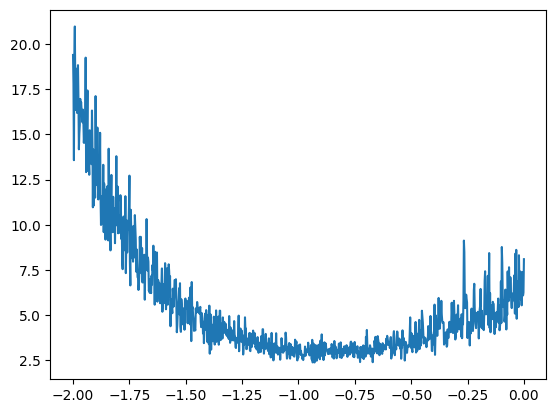

In [221]:
plt.plot(lri, lossi)

In [223]:
emb.shape

torch.Size([32, 3, 2])

In [225]:
emb[1,:,:]

tensor([[-0.1989,  0.4979],
        [-0.6021, -0.1073],
        [-0.6021, -0.1073]], grad_fn=<SliceBackward0>)

In [ ]:
tensor([[ 1.0830,  1.2915],
        [ 1.0830,  1.2915],
        [-0.7372, -0.1572]])